This file cleans state 2 specific feature, `mems_radius`.

In [60]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# get android and ios cleaned data
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "processed").exists())
ios_df = pd.read_csv(root / "data" / "processed" / "ios.csv", header=0)
android_df = pd.read_csv(root / "data" / "processed" / "android.csv", header=0)


In [62]:
android_df.columns

Index(['init_time', 'eventAction', 'payloadCreation', 'eventStart', 'eventEnd',
       'eventType', 'eventSampleSpeed', 'eventDurationSeconds',
       'eventMilesDriven', 'eventStartLatitude', 'eventStartLongitude',
       'eventEndLatitude', 'eventEndLongitude', 'eventSensorDetectionMthd',
       'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed',
       'eventSpeedChange', 'memsMedianLateralAccel', 'memsP75LateralAccel',
       'memsP95LateralAccel', 'memsMedianHorizontalNorm',
       'memsP75HorizontalNorm', 'memsP95HorizontalNorm',
       'gpsMedianLateralAccel', 'gpsP75LateralAccel', 'gpsP95LateralAccel',
       'bearing_angular_change_per_second', 'gyro_angular_change_per_second',
       'bearingAngleChange', 'gyroAngleChange', 'mems_radius', 'gps_radius',
       'validity_mean', 'speed_gap', 'aggressive'],
      dtype='object')

In [63]:
# get state 0 only for iOS
ios_df['eventSensorDetectionMthd'] = pd.to_numeric(ios_df['eventSensorDetectionMthd'], errors='coerce')
ios_df = ios_df.dropna(subset=['eventSensorDetectionMthd'])
ios_df['eventSensorDetectionMthd'] = ios_df['eventSensorDetectionMthd'].astype(int)

ios_df = ios_df[ios_df['eventSensorDetectionMthd'] == 2].copy()
print(ios_df['eventSensorDetectionMthd'].unique())

[2]


In [64]:
# get state 0 only for Android

android_df['eventSensorDetectionMthd'] = pd.to_numeric(android_df['eventSensorDetectionMthd'], errors='coerce')
android_df = android_df.dropna(subset=['eventSensorDetectionMthd'])
android_df['eventSensorDetectionMthd'] = android_df['eventSensorDetectionMthd'].astype(int)

android_df = android_df[android_df['eventSensorDetectionMthd'] == 2].copy()
print(android_df['eventSensorDetectionMthd'].unique())

[2]


In [65]:
kept_columns = [
    "eventType",
    "eventSampleSpeed",
    "eventDurationSeconds",
    "eventGPSSignalStrength",
    "eventStartSpeed",
    "eventEndSpeed",
    'eventMilesDriven',
    "memsMedianLateralAccel",
    "memsP75LateralAccel",
    "memsP95LateralAccel",
    "gyro_angular_change_per_second",
    "gyroAngleChange",
    "mems_radius", 
    'aggressive'
]

android_df = android_df[[c for c in kept_columns if c in android_df.columns]]
ios_df = ios_df[[c for c in kept_columns if c in ios_df.columns]]

print(android_df.columns)
print(ios_df.columns)

Index(['eventType', 'eventSampleSpeed', 'eventDurationSeconds',
       'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed',
       'eventMilesDriven', 'memsMedianLateralAccel', 'memsP75LateralAccel',
       'memsP95LateralAccel', 'gyro_angular_change_per_second',
       'gyroAngleChange', 'mems_radius', 'aggressive'],
      dtype='object')
Index(['eventType', 'eventSampleSpeed', 'eventDurationSeconds',
       'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed',
       'eventMilesDriven', 'memsMedianLateralAccel', 'memsP75LateralAccel',
       'memsP95LateralAccel', 'gyro_angular_change_per_second',
       'gyroAngleChange', 'mems_radius', 'aggressive'],
      dtype='object')


In [66]:
android_df.shape, ios_df.shape

((591, 14), (28421, 14))

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_38066/1474316554.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


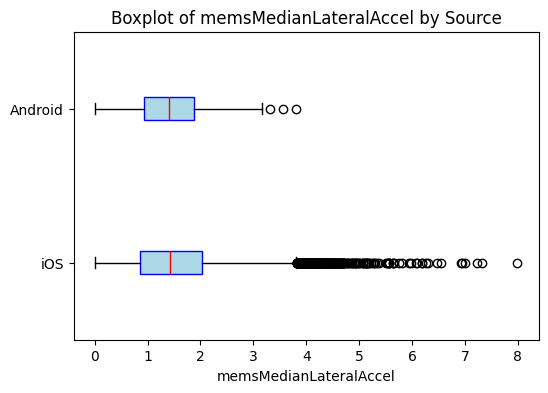

In [67]:
plt.figure(figsize=(6,4))

# Split data
ios_data = ios_df['memsMedianLateralAccel']
android_data = android_df['memsMedianLateralAccel']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True, 
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsMedianLateralAccel by Source")
plt.xlabel("memsMedianLateralAccel")
plt.show()

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_38066/633970154.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


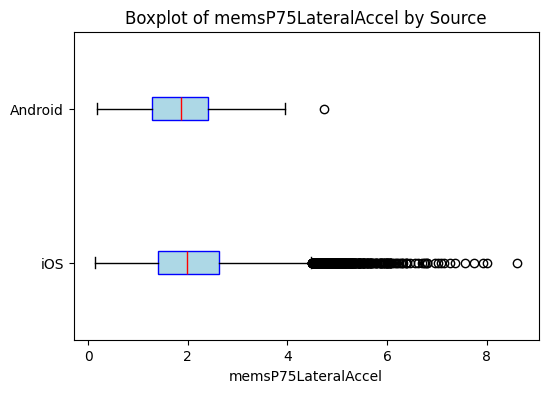

In [68]:
plt.figure(figsize=(6,4))

# Split data
ios_data = ios_df['memsP75LateralAccel']
android_data = android_df['memsP75LateralAccel']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsP75LateralAccel by Source")
plt.xlabel("memsP75LateralAccel")
plt.show()

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_38066/2786032941.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


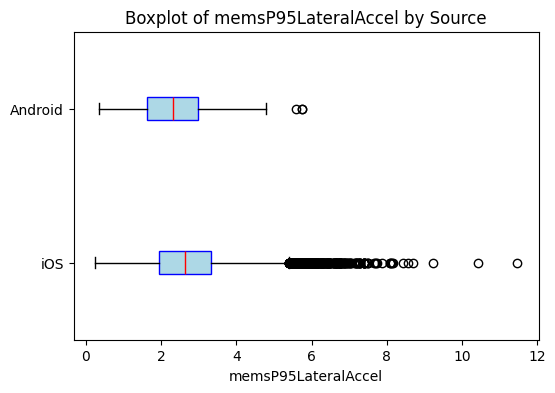

In [69]:
plt.figure(figsize=(6,4))

# Split data
ios_data = ios_df['memsP95LateralAccel']
android_data = android_df['memsP95LateralAccel']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsP95LateralAccel by Source")
plt.xlabel("memsP95LateralAccel")
plt.show()

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_38066/718395841.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


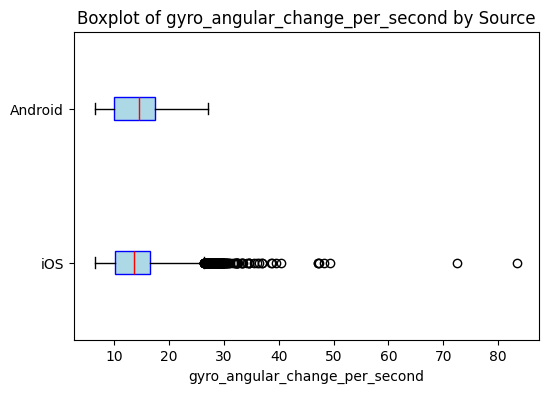

In [70]:
plt.figure(figsize=(6,4))

# Split data
ios_data = ios_df['gyro_angular_change_per_second']
android_data = android_df['gyro_angular_change_per_second']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gyro_angular_change_per_second by Source")
plt.xlabel("gyro_angular_change_per_second")
plt.show()

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_38066/2458056715.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


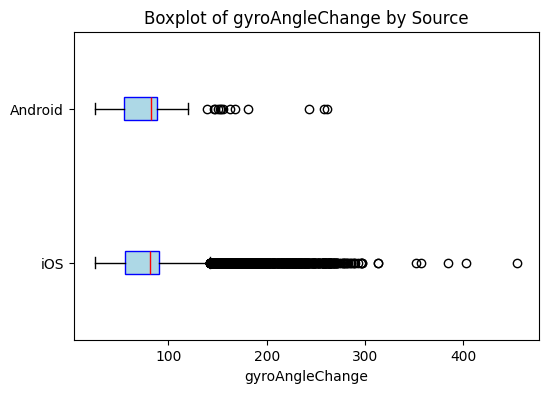

In [71]:
plt.figure(figsize=(6,4))

# Split data
ios_data = ios_df['gyroAngleChange']
android_data = android_df['gyroAngleChange']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gyroAngleChange by Source")
plt.xlabel("gyroAngleChange")
plt.show()

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_38066/2264666994.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


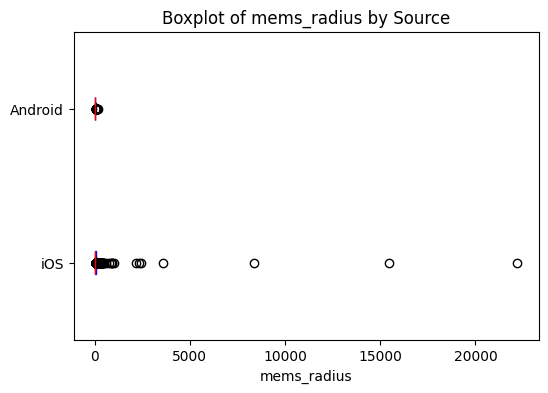

In [72]:
plt.figure(figsize=(6,4))

# Split data
ios_data = ios_df['mems_radius']
android_data = android_df['mems_radius']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of mems_radius by Source")
plt.xlabel("mems_radius")
plt.show()

In [73]:
# Find percentile where infinite values start
n_total = len(ios_df)
n_inf = np.isinf(ios_df['mems_radius']).sum()
percentile_start = (1 - n_inf / n_total) * 100
print(f"Infinite values start above the {percentile_start:.2f}th percentile")

Infinite values start above the 100.00th percentile


In [74]:
ios_df.describe()

,eventType,eventSampleSpeed,eventDurationSeconds,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,eventMilesDriven,memsMedianLateralAccel,memsP75LateralAccel,memsP95LateralAccel,gyro_angular_change_per_second,gyroAngleChange,mems_radius,aggressive
count,28421.000000,28421.000000,28421.000000,28421.000000,28421.000000,28421.000000,28421.000000,28421.000000,28421.000000,28421.000000,28421.000000,28421.000000,28421.000000,28421.0
mean,4.505260,16.442098,5.992271,5.425598,16.502289,17.911573,0.025808,1.498564,2.074735,2.707490,13.680174,78.199019,36.693139,0.0
std,0.499981,8.408000,2.887104,1.997493,10.115956,8.443862,0.023121,0.862527,0.923682,1.044011,4.421786,34.126182,173.838705,0.0
min,4.000000,5.002241,1.004305,2.000000,0.000000,0.000000,0.000000,0.000000,0.134464,0.236015,6.500058,25.002314,0.464979,0.0
25%,4.000000,10.439232,4.288656,4.738076,8.745938,12.119717,0.012969,0.849677,1.396278,1.953067,10.152763,55.603287,15.616513,0.0
50%,5.000000,14.765051,5.310000,4.746565,15.492065,16.580538,0.019947,1.427169,1.987741,2.624382,13.570994,80.723114,24.931187,0.0
75%,5.000000,20.021923,6.838750,5.000000,22.059895,21.864845,0.030558,2.037106,2.633317,3.329514,16.647533,90.303444,42.442577,0.0
max,5.000000,92.908905,24.980251,10.534029,93.422874,92.795654,0.282270,7.995974,8.619404,11.475686,83.502884,455.013920,22208.250000,0.0


In [75]:
ninety_fifth_percentile = ios_df['mems_radius'].quantile(0.95)
ios_df = ios_df[ios_df['mems_radius'] <= ninety_fifth_percentile]
ninety_fifth_percentile_a = android_df['mems_radius'].quantile(0.95)
android_df = android_df[android_df['mems_radius'] <= ninety_fifth_percentile_a]

In [76]:
ios_df.describe()

,eventType,eventSampleSpeed,eventDurationSeconds,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,eventMilesDriven,memsMedianLateralAccel,memsP75LateralAccel,memsP95LateralAccel,gyro_angular_change_per_second,gyroAngleChange,mems_radius,aggressive
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.0
mean,4.501222,15.720855,5.952860,5.432594,15.743681,17.217793,0.024686,1.478060,2.050478,2.680659,13.964940,79.420534,29.497314,0.0
std,0.500008,7.531195,2.873677,1.999349,9.345053,7.652345,0.022234,0.850734,0.913782,1.032607,4.300014,34.038046,19.447847,0.0
min,4.000000,5.002241,1.004305,2.000000,0.000000,0.000000,0.000000,0.000000,0.134464,0.236015,6.500506,25.002314,0.464979,0.0
25%,4.000000,10.257638,4.282375,4.738221,8.452918,11.916408,0.012686,0.833457,1.368324,1.925551,10.626273,58.044535,15.231322,0.0
50%,5.000000,14.412118,5.288153,4.746583,15.043242,16.226017,0.019347,1.399654,1.961496,2.599689,13.878543,81.628263,23.815970,0.0
75%,5.000000,19.246917,6.767703,5.000000,21.144592,21.122814,0.029206,2.014884,2.615769,3.308947,16.818831,90.571621,38.595689,0.0
max,5.000000,79.728650,24.980251,10.534029,79.473785,80.083910,0.282270,7.319323,7.745981,10.414362,72.492150,455.013920,93.307335,0.0


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_38066/323376872.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_df['mems_radius'], android_df['mems_radius']],


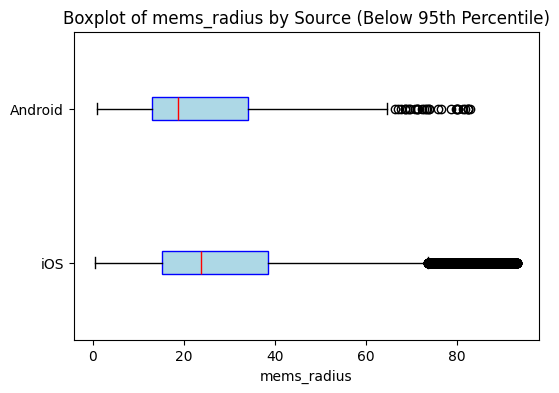

In [77]:
# Create box plot of new dataframe
plt.figure(figsize=(6,4))
plt.boxplot([ios_df['mems_radius'], android_df['mems_radius']],
    vert=False,
    labels=["iOS", "Android"],
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red"),
)

plt.title("Boxplot of mems_radius by Source (Below 95th Percentile)")
plt.xlabel("mems_radius")
plt.show()

In [78]:
ios_df['dv'] = ios_df['eventEndSpeed'] - ios_df['eventStartSpeed']
ios_df['dv'] = ios_df['dv'].abs()
ios_df['turn_intensity'] = (1 / (ios_df['mems_radius'] + 1)) * ios_df['gyro_angular_change_per_second']
ios_df['angle_norm'] = np.sin(np.deg2rad(ios_df['gyroAngleChange'] / 2))
ios_df['radius_log'] = np.log1p(ios_df['mems_radius'])

android_df['dv'] = android_df['eventEndSpeed'] - android_df['eventStartSpeed']
android_df['dv'] = android_df['dv'].abs()
android_df['turn_intensity'] = (1 / (android_df['mems_radius'] + 1)) * android_df['gyro_angular_change_per_second']
android_df['angle_norm'] = np.sin(np.deg2rad(android_df['gyroAngleChange'] / 2))
android_df['radius_log'] = np.log1p(android_df['mems_radius'])



In [79]:
# Save new_df to file to later load
android_df.to_pickle(root / "data" / "processed" / "state2" / 'android_df.pkl')
ios_df.to_pickle(root / "data" / "processed" / "state2" / 'ios_df.pkl')